## 코로나 관련 소비 형태소 분석 - 다음

In [10]:
import pandas as pd 
import numpy as np

In [11]:
import requests
from bs4 import BeautifulSoup

BeautifulSoup을 이용한 뉴스 본문 내용 크롤링 

In [12]:
#빈리스트 이용해서 기사 제목, 본문 요약, url 담기
news_list = []

- 제목 = title, 본문 = source, Url = content

news_list를 데이터 프레임으로 만들게 되면 중복된 요소들이 많아 중복된 기사의 내용 제거 후 인덱스 재정렬

In [14]:
news_list = pd.DataFrame(news_list)
news_list = news_list.drop_duplicates()
news_list = news_list.reset_index(drop = True)
news_list.head(5)

,title,source,content
0,"신세계TV쇼핑, 매달 스페셜 쇼핑데이 연다",(사진=신세계TV쇼핑) [이데일리 함지현 기자]신세계TV쇼핑은 오는 27일 ‘신세계...,http://v.media.daum.net/v/20190926060028020
1,올해 이커머스 쇼핑 키워드는 '1인 쇼핑·1일 할인',인터파크가 2019년 온라인 쇼핑 트렌드를 '1인 쇼핑과 1일 할인으로 선정했다. ...,http://v.media.daum.net/v/20191205142831330
2,"경남은행, 쇼핑 최적화 '요즘쇼핑카드' 출시",BNK경남은행이 20일 쇼핑에 최적화된 '요즘쇼핑카드'를 출시했다./사진제공=경남은...,http://v.media.daum.net/v/20190920163221170
3,"출근길 음악 들으며 쇼핑을..신세계TV쇼핑, 색다른 모바일 방송 ...",[사진 제공 = 신세계TV쇼핑] 신세계TV쇼핑이 음악과 쇼핑을 함께 즐기는 신개념 ...,http://v.media.daum.net/v/20191121104802734
4,AI쇼핑 시대 활짝..네이버쇼핑 이용자 80% 'AiTEMS' 쓴다,네이버쇼핑이 인공지능(AI) 쇼핑 강자로 급부상했다. 딥 러닝(인공 신경망을 이용한...,http://v.media.daum.net/v/20191017143526132


news_list에서는 언론사를 따로 알 수 없으므로, 다음뉴스 태그 부분이 아닌 언론사 뉴스 태그 부분을 newslist2에 가지고 온 후 위의 작업을 수행함 
concat을 이용하여 news_list와 newslist2 합침 

In [18]:
news_list2 = pd.DataFrame(news_list2)

news_list2 = news_list2.drop_duplicates()


news_list2 = news_list2.reset_index(drop = True)
#news_list2.head(5)

news_df = pd.concat([news_list2,news_media],axis=1)

news_df.head()

,source,content,media,news_media
0,(사진=신세계TV쇼핑) [이데일리 함지현 기자]신세계TV쇼핑은 오는 27일 ‘신세계...,http://v.media.daum.net/v/20190926060028020?f=o,2019.09.26 | 이데일리 | 다음뉴스,이데일리
1,인터파크가 2019년 온라인 쇼핑 트렌드를 '1인 쇼핑과 1일 할인으로 선정했다. ...,http://v.media.daum.net/v/20191205142831330?f=o,2019.12.05 | 디지털타임스 | 다음뉴스,디지털타임스
2,BNK경남은행이 20일 쇼핑에 최적화된 '요즘쇼핑카드'를 출시했다./사진제공=경남은...,http://v.media.daum.net/v/20190920163221170?f=o,2019.09.20 | 머니투데이 | 다음뉴스,머니투데이
3,[사진 제공 = 신세계TV쇼핑] 신세계TV쇼핑이 음악과 쇼핑을 함께 즐기는 신개념 ...,http://v.media.daum.net/v/20191121104802734?f=o,2019.11.21 | 매일경제 | 다음뉴스,매일경제
4,네이버쇼핑이 인공지능(AI) 쇼핑 강자로 급부상했다. 딥 러닝(인공 신경망을 이용한...,http://v.media.daum.net/v/20191017143526132?f=o,2019.10.17 | 전자신문 | 다음뉴스,전자신문


14:-8를 통해 언론사 부분만 가지고 옴 그 후 수집해온 데이터에서 언론사 카운트

In [17]:
news_media= []
for i in range(0,len(news_list2['media'])):
    a={}; 
    a['news_media'] = (news_list2['media'][i][14:-8]);
    news_media.append(a)
news_media = pd.DataFrame(news_media)
news_media.value_counts()

news_media
이데일리          7
머니투데이         5
아시아경제         5
매일경제          5
뉴스1           4
MBN           4
전자신문          4
파이낸셜뉴스        3
아이뉴스24        3
데일리안          3
디지털타임스        3
정책브리핑         3
연합뉴스          3
지디넷코리아        3
서울신문          2
중앙일보          2
세계일보          2
문화일보          2
한국경제          2
뉴시스           2
스포츠동아         2
티브이데일리        1
조선일보          1
조선비즈          1
채널A           1
쿠키뉴스          1
텐아시아          1
KBS           1
엑스포츠뉴스        1
스포티비뉴스        1
스포츠조선         1
MBC           1
스타투데이         1
스타뉴스          1
서울경제          1
마이데일리         1
동아일보          1
노컷뉴스          1
국민일보          1
경향신문          1
MK스포츠         1
한국일보          1
dtype: int64

- 언론사 컨택

In [19]:
mediaName = pd.read_csv('capston/media_name.csv')
mediaName

,news_media
0,경향신문
1,국민일보
2,뉴스1
3,뉴시스
4,동아일보
...,...
135,포토친구
136,뉴스와이어
137,뉴시스와이어
138,연합뉴스 보도자료


In [20]:
Media_count = []
Notcount ={}
mediaName['count'] = 0; 

for i in range(0,len(news_df['news_media'])):
    for j in range(0,len(mediaName['news_media'])):
        if (news_df['news_media'][i] == mediaName['news_media'][j]):
            mediaName['count'][j] += 1
mediaName

<ipython-input-20-3efa8e0511a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediaName['count'][j] += 1


,news_media,count
0,경향신문,1
1,국민일보,1
2,뉴스1,4
3,뉴시스,2
4,동아일보,1
...,...,...
135,포토친구,0
136,뉴스와이어,0
137,뉴시스와이어,0
138,연합뉴스 보도자료,0


In [21]:
news_list['content']

0     http://v.media.daum.net/v/20190926060028020
1     http://v.media.daum.net/v/20191205142831330
2     http://v.media.daum.net/v/20190920163221170
3     http://v.media.daum.net/v/20191121104802734
4     http://v.media.daum.net/v/20191017143526132
                         ...                     
85    http://v.media.daum.net/v/20190904130721845
86    http://v.media.daum.net/v/20191212085409442
87    http://v.media.daum.net/v/20191129050146672
88    http://v.media.daum.net/v/20190821091915171
89    http://v.media.daum.net/v/20191203120059925
Name: content, Length: 90, dtype: object

news_list['content']의 부분이 url 부분이였으므로, 본문 기사를 가져오기 위해 사용 
위의 크롤링 방식을 이용해 본문 내용 가지고 옴 but 정제되어 있지 않음

In [23]:
real_contents = pd.DataFrame(real_contents)
real_contents.head(5)

,content
0,\n\n\n\n (사진=신세계TV쇼핑)\n \...
1,\n\n\n\n 인터파크가 2019년 온라인 쇼핑 트렌드를 '1...
2,\n\n\n\n BNK경남은행이 20일 쇼핑에 최적화된 '요즘쇼...
3,\n\n\n\n [사진 제공 = 신세계TV쇼핑]\n ...
4,\n네이버쇼핑이 인공지능(AI) 쇼핑 강자로 급부상했다. 딥 러닝(인공 신경망을 이...


In [24]:
import requests
from bs4 import BeautifulSoup
import math
import pandas
import re
import operator
import time
import datetime
from konlpy.tag import Komoran

필요한 클랜징 부분들을 정규화 된 표현식으로 지운 후 real_contents['contentNew']에 저장 후, 
Okt()를 이용한 명사 형태소 분석 

 Okt()를 이용한 명사 형태소 분석한 것을 nouns열에 저장 

In [26]:
from konlpy.tag import Okt
from collections import Counter

(90, 3)


,content,contentNew,nouns
0,\n\n\n\n (사진=신세계TV쇼핑)\n \...,사진 신세계 쇼핑 이데일리 함지현 기자 신세계 쇼핑은 오는 일 신세계 쇼핑 데이 ...,"[사진, 신세계, 쇼핑, 이데일리, 지현, 기자, 신세계, 쇼핑, 신세계, 쇼핑, ..."
1,\n\n\n\n 인터파크가 2019년 온라인 쇼핑 트렌드를 '1...,인터파크가 년 온라인 쇼핑 트렌드를 인 쇼핑과 일 할인으로 선정했다 인터파크 제공...,"[인터파크, 온라인, 쇼핑, 트렌드, 쇼핑, 할인, 선정, 인터파크, 제공, 디지털..."
2,\n\n\n\n BNK경남은행이 20일 쇼핑에 최적화된 '요즘쇼...,경남은행이 일 쇼핑에 최적화된 요즘쇼핑카드 를 출시했다 사진제공 경남은행 경남은행...,"[경남, 은행, 쇼핑, 최적화, 요즘, 쇼핑, 카드, 출시, 사진, 제공, 경남, ..."
3,\n\n\n\n [사진 제공 = 신세계TV쇼핑]\n ...,사진 제공 신세계 쇼핑 신세계 쇼핑이 음악과 쇼핑을 함께 즐기는 신개념 쇼핑 방송...,"[사진, 제공, 신세계, 쇼핑, 신세계, 쇼핑, 음악, 쇼핑, 개념, 쇼핑, 방송,..."
4,\n네이버쇼핑이 인공지능(AI) 쇼핑 강자로 급부상했다. 딥 러닝(인공 신경망을 이...,네이버쇼핑이 인공지능 쇼핑 강자로 급부상했다 딥 러닝 인공 신경망을 이용한 데이터...,"[네이버, 쇼핑, 인공, 지능, 쇼핑, 급부, 러닝, 인공, 신경망, 이용, 데이터..."


In [27]:
real_contents.head()

,content,contentNew,nouns
0,\n\n\n\n (사진=신세계TV쇼핑)\n \...,사진 신세계 쇼핑 이데일리 함지현 기자 신세계 쇼핑은 오는 일 신세계 쇼핑 데이 ...,"[사진, 신세계, 쇼핑, 이데일리, 지현, 기자, 신세계, 쇼핑, 신세계, 쇼핑, ..."
1,\n\n\n\n 인터파크가 2019년 온라인 쇼핑 트렌드를 '1...,인터파크가 년 온라인 쇼핑 트렌드를 인 쇼핑과 일 할인으로 선정했다 인터파크 제공...,"[인터파크, 온라인, 쇼핑, 트렌드, 쇼핑, 할인, 선정, 인터파크, 제공, 디지털..."
2,\n\n\n\n BNK경남은행이 20일 쇼핑에 최적화된 '요즘쇼...,경남은행이 일 쇼핑에 최적화된 요즘쇼핑카드 를 출시했다 사진제공 경남은행 경남은행...,"[경남, 은행, 쇼핑, 최적화, 요즘, 쇼핑, 카드, 출시, 사진, 제공, 경남, ..."
3,\n\n\n\n [사진 제공 = 신세계TV쇼핑]\n ...,사진 제공 신세계 쇼핑 신세계 쇼핑이 음악과 쇼핑을 함께 즐기는 신개념 쇼핑 방송...,"[사진, 제공, 신세계, 쇼핑, 신세계, 쇼핑, 음악, 쇼핑, 개념, 쇼핑, 방송,..."
4,\n네이버쇼핑이 인공지능(AI) 쇼핑 강자로 급부상했다. 딥 러닝(인공 신경망을 이...,네이버쇼핑이 인공지능 쇼핑 강자로 급부상했다 딥 러닝 인공 신경망을 이용한 데이터...,"[네이버, 쇼핑, 인공, 지능, 쇼핑, 급부, 러닝, 인공, 신경망, 이용, 데이터..."


### apriori 기법 활용

word_list= 따로 불용어 지정, media_list = 언론사 이름 제거

In [28]:
from apyori import apriori

word_list = ['사진', '뉴스', '기자', '쇼핑','제공'] 
media_list = mediaName['news_media'].tolist()

transactions = real_contents['nouns'].tolist()
transactions[0] = [noun for noun in transactions[0] if transactions[0] not in word_list]
transactions[0] = [noun for noun in transactions[0] if transactions[0] not in media_list]
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
#transactions

In [29]:
from apyori import apriori
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
    min_support=0.06,
    min_confidence=0.05,
    min_lift=1.0,
    max_length=2))
#print(results)


In [30]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.info()

network_df= network_df.sample(n=100,
          weights='support'
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   source   5110 non-null   object 
 1   target   5110 non-null   object 
 2   support  5110 non-null   float64
dtypes: float64(1), object(2)
memory usage: 119.9+ KB


In [31]:
# 말뭉치를 추출 -> real_contents['contentNew']의 경우 본문 내용 정제 [ 명사 형태소 X]
corpus = "".join(real_contents['contentNew'].tolist())

In [32]:
import nltk
from collections import Counter
from wordcloud import WordCloud
word_list = ['사진', '뉴스', '기자', '쇼핑','제공']
media_list = mediaName['news_media'].tolist()

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(corpus)
nouns = [noun for noun in nouns if noun not in word_list]
nouns = [noun for noun in nouns if noun not in media_list]

count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize']) 
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.

node_df

,node,nodesize
0,신세계,84
3,행사,62
5,진행,66
7,방송,108
10,브랜드,51
12,상품,236
16,할인,88
23,구매,95
58,판매,109
68,홈쇼핑,61


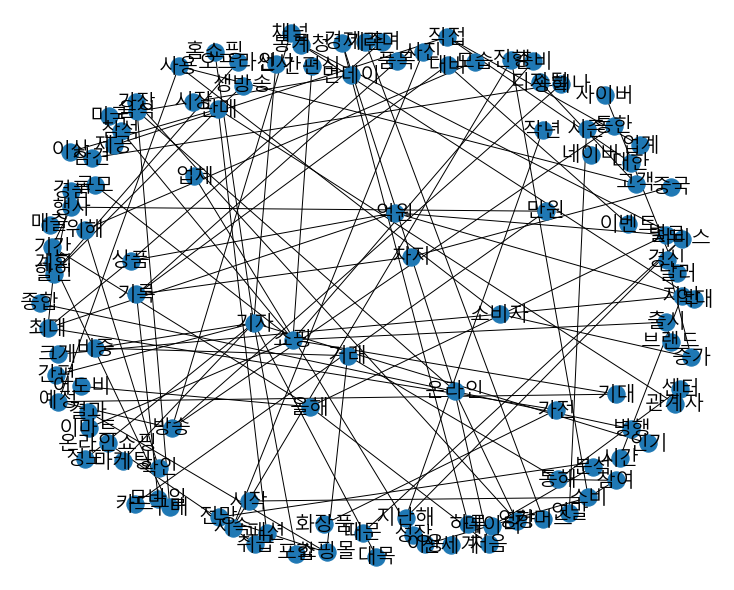

In [36]:
import nltk
from collections import Counter
from wordcloud import WordCloud
import nltk
from matplotlib import font_manager, rc

import networkx as nx

#폰트 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(10,8))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정합니다.
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, k=0.6, iterations=50)

nx.draw(G, pos=pos)

nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=20)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()

In [34]:
import requests
from bs4 import BeautifulSoup
import math
import pandas
import re
import operator
import time
import datetime
from konlpy.tag import Komoran

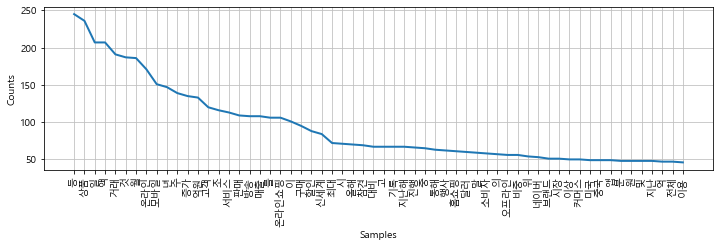

In [35]:
from nltk import Text
import matplotlib.pyplot as plt
from collections import Counter

plt.figure(figsize=(12, 3))
kolaw = Text(nouns, name="kolaw")
kolaw.plot(60)
plt.show()

워드 클라우드 시각화

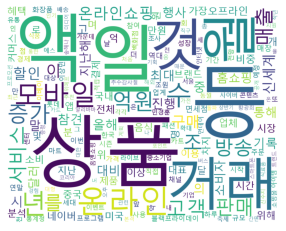

<Figure size 432x288 with 0 Axes>

In [37]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = 'c:/Windows/Fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()
plt.savefig("wordcloud2019")

## 2020년도 데이터

2019년도 데이터와 동일한 방식, 그러나 "쇼핑"이 아닌 "코로나 쇼핑"으로 크롤링

In [39]:
news_list4 = pd.DataFrame(news_list4)
news_list4 = news_list4.drop_duplicates()
news_list4 = news_list4.reset_index(drop = True)
news_list4.head()

#news_list4[news_list4['content'].isnull()]

,title,source,content
0,히트 상품도 바꾼 코로나..쇼핑 검색 1위는 '마스크',[서울=뉴시스] 손정빈 기자 = 코로나 사태가 쇼핑 검색어를 바꿔놨다. TV홈쇼핑 ...,http://v.media.daum.net/v/20201214091912595
1,"변종 코로나에도 ""쇼핑은 해야 돼~""",정부가 영국에서 유행 중인 코로나19 변이 바이러스의 국내 전파를 차단하기 위해 연...,http://v.media.daum.net/v/20201227095935260
2,코로나시대 쇼핑은 블랙프라이데이 대신 사이버 먼데이,[이미지출처=EPA연합뉴스] [아시아경제 뉴욕=백종민 특파원] 신종 코로나바이러스 ...,http://v.media.daum.net/v/20201202053011409
3,"롯데쇼핑, '코로나 블루' 극복 위한 맞춤 심리상담",비대면으로 심리 상담을 받고 있다.롯데쇼핑 제공 롯데쇼핑이 직원들을 대상으로 코로나...,http://v.media.daum.net/v/20201230050728487
4,[주말쇼핑포인트]코로나 시대 쇼핑은?..백화점 세일도 '언택트'가...,있다. 최근 심상치않은 코로나19 확산세(신종 코로나바이러스 감염증)를 반영한 듯 ...,http://v.media.daum.net/v/20201121075005412


2019년도 기사와 다르게 아래의 코드를 쓴 이유는 다음 제휴 언론사 140개에 들지 않는 기사들의 경우가 존재하여 그 기사들을 제거하는 방법필요

In [40]:
news_list4 = news_list4.dropna(axis=0)
news_list4 = news_list4.reset_index(drop = True)

In [41]:
news_list4.head()
#news_list4['content'][18]

,title,source,content
0,히트 상품도 바꾼 코로나..쇼핑 검색 1위는 '마스크',[서울=뉴시스] 손정빈 기자 = 코로나 사태가 쇼핑 검색어를 바꿔놨다. TV홈쇼핑 ...,http://v.media.daum.net/v/20201214091912595
1,"변종 코로나에도 ""쇼핑은 해야 돼~""",정부가 영국에서 유행 중인 코로나19 변이 바이러스의 국내 전파를 차단하기 위해 연...,http://v.media.daum.net/v/20201227095935260
2,코로나시대 쇼핑은 블랙프라이데이 대신 사이버 먼데이,[이미지출처=EPA연합뉴스] [아시아경제 뉴욕=백종민 특파원] 신종 코로나바이러스 ...,http://v.media.daum.net/v/20201202053011409
3,"롯데쇼핑, '코로나 블루' 극복 위한 맞춤 심리상담",비대면으로 심리 상담을 받고 있다.롯데쇼핑 제공 롯데쇼핑이 직원들을 대상으로 코로나...,http://v.media.daum.net/v/20201230050728487
4,[주말쇼핑포인트]코로나 시대 쇼핑은?..백화점 세일도 '언택트'가...,있다. 최근 심상치않은 코로나19 확산세(신종 코로나바이러스 감염증)를 반영한 듯 ...,http://v.media.daum.net/v/20201121075005412


In [43]:
##함수 생략
real_contents2020['news_text'] = real_contents2020['content'].apply(lambda x: text_cleaning(x))
#news_title
real_contents2020.head(5)

,content,news_text
0,\n\n\n\n[서울=뉴시스] 손정빈 기자 = 코로나 사태가 쇼핑 검색어를 바꿔놨다...,서울뉴시스 손정빈 기자 코로나 사태가 쇼핑 검색어를 바꿔놨다 홈쇼핑 판매량 순위도...
1,\n\n\n\n 정부가 영국에서 유행 중인 코로나19 변이 바이...,정부가 영국에서 유행 중인 코로나 변이 바이러스의 국내 전파를...
2,\n\n\n\n [이미지출처=EPA연합뉴스]\n ...,이미지출처연합뉴스 아시아경제 뉴욕백종민 특파...
3,\n[서울신문]\n\n\n\n 롯데쇼핑 직원이 비대면으로 심리 ...,서울신문 롯데쇼핑 직원이 비대면으로 심리 상담을 받고 있다롯데쇼...
4,\n\n\n\n 올해 마지막 겨울 정기세일에 돌입한 지난 13일...,올해 마지막 겨울 정기세일에 돌입한 지난 일 오전 서울 중구 ...


In [44]:
from konlpy.tag import Okt
from collections import Counter

##함수 생략

real_contents2020['nouns'] = real_contents2020['news_text'].apply(lambda x: get_nouns(x))
print(real_contents2020.shape)
real_contents2020.head()

(75, 3)


,content,news_text,nouns
0,\n\n\n\n[서울=뉴시스] 손정빈 기자 = 코로나 사태가 쇼핑 검색어를 바꿔놨다...,서울뉴시스 손정빈 기자 코로나 사태가 쇼핑 검색어를 바꿔놨다 홈쇼핑 판매량 순위도...,"[서울, 뉴시스, 손정, 기자, 코로나, 사태, 쇼핑, 검색어, 홈쇼핑, 판매량, ..."
1,\n\n\n\n 정부가 영국에서 유행 중인 코로나19 변이 바이...,정부가 영국에서 유행 중인 코로나 변이 바이러스의 국내 전파를...,"[정부, 영국, 유행, 중인, 코로나, 바이러스, 국내, 전파, 차단, 위해, 연말..."
2,\n\n\n\n [이미지출처=EPA연합뉴스]\n ...,이미지출처연합뉴스 아시아경제 뉴욕백종민 특파...,"[이미지, 출처, 연합뉴스, 아시아, 경제, 뉴욕, 백종민, 특파원, 신종, 코로나..."
3,\n[서울신문]\n\n\n\n 롯데쇼핑 직원이 비대면으로 심리 ...,서울신문 롯데쇼핑 직원이 비대면으로 심리 상담을 받고 있다롯데쇼...,"[서울, 신문, 롯데, 쇼핑, 직원, 대면, 심리, 상담, 롯데, 쇼핑, 제공, 롯..."
4,\n\n\n\n 올해 마지막 겨울 정기세일에 돌입한 지난 13일...,올해 마지막 겨울 정기세일에 돌입한 지난 일 오전 서울 중구 ...,"[올해, 마지막, 겨울, 정기, 돌입, 지난, 오전, 서울, 중구, 롯데, 백화점,..."


In [45]:
# 말뭉치를 추출합니다.
corpus_2020 = "".join(real_contents2020['news_text'].tolist())

In [208]:
from konlpy.tag import Okt

word_list = ['사진', '뉴스', '기자', '쇼핑','제공','등','것']
media_list = mediaName['news_media'].tolist()

okt =Okt()
nouns_2020 = nouns_tagger.nouns(corpus_2020)
nouns_2020 = [noun for noun in nouns_2020 if noun not in word_list]
nouns_2020 = [noun for noun in nouns_2020 if noun not in media_list]

count_2020 = Counter(nouns_2020)

# 한글자 키워드를 제거합니다.
remove_char_counter_2020 = Counter({x : count_2020[x] for x in count_2020 if len(x) > 1})


In [47]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.

node_2020 =pd.DataFrame(remove_char_counter_2020.items(), columns=['node', 'nodesize']) 
node_2020 = node_2020[node_2020['nodesize'] >= 30] # ‘nodesize’ 30 이하는 제거

node_2020

,node,nodesize
0,서울,30
2,코로나,260
5,홈쇼핑,30
10,지난,56
14,분석,47
...,...,...
1225,점포,37
1409,영업,51
1583,거래,62
1650,선물,33


#### 밑의 조건문 약간 달라짐 

In [242]:
transactions_2020 = real_contents2020['nouns'].tolist()
for i in range(0, len(transactions_2020)-1):
    for j in transactions_2020[i] :
        if (j in word_list):
             transactions_2020[i].remove(j)
        if (j in media_list):
             transactions_2020[i].remove(j)
        #transactions_2020[i] = [noun for noun in transactions_2020[i] if transactions_2020[i][j] not in word_list]
        #transactions_2020[i] = [noun for noun in transactions_2020[i] if transactions_2020[i] not in media_list]
transactions_2020 = [transaction for transaction in transactions_2020 if transactions_2020] # 공백 문자열을 방지합니다.
transactions_2020[0]

['서울',
 '손정',
 '코로나',
 '사태',
 '검색어',
 '홈쇼핑',
 '판매량',
 '순위도',
 '예년',
 '티몬',
 '지난',
 '월일',
 '검색',
 '데이터',
 '분석',
 '결과',
 '올해',
 '가장',
 '검색',
 '단어',
 '마스크',
 '지난해',
 '해도',
 '마스크',
 '주요',
 '검색',
 '순위',
 '이름',
 '마스크',
 '올해',
 '처음',
 '검색',
 '상위',
 '오른',
 '단어',
 '게임기',
 '코로나',
 '사태',
 '실내',
 '생활',
 '여가',
 '생활',
 '하나로',
 '게임',
 '사람',
 '분석',
 '반면',
 '여행',
 '관련',
 '단어',
 '대부분',
 '순위',
 '지난해',
 '레저',
 '입장권',
 '해외여행',
 '올해',
 '지난해',
 '여행',
 '추세',
 '티몬',
 '다른',
 '쇼핑몰',
 '홈쇼핑',
 '홈쇼핑',
 '판매량',
 '마스크',
 '황사',
 '마스크',
 '퓨어',
 '마스크',
 '사회',
 '거리',
 '두기',
 '횟수',
 '식품',
 '보양식',
 '전복',
 '판매량',
 '전체',
 '맥락',
 '분석',
 '홈쇼핑',
 '관계자',
 '코로나',
 '사태',
 '노멀',
 '트렌드',
 '홈쇼핑',
 '상품',
 '그대로',
 '현대',
 '홈쇼핑',
 '일편',
 '마스크',
 '기존',
 '상위',
 '뷰티',
 '헤어',
 '관련',
 '상품',
 '순위',
 '각종',
 '식품',
 '진입',
 '역시',
 '코로나',
 '사태',
 '영향',
 '풀이',
 '식품',
 '브랜드',
 '천하',
 '일미',
 '주부',
 '롯데',
 '홈쇼핑',
 '식품',
 '각종',
 '식품',
 '취급',
 '김나운',
 '키친',
 '진입',
 '김나운',
 '키친',
 '제품',
 '작년',
 '매출',
 '이상',
 '공감',
 '언론']

In [49]:
from apyori import apriori
# 연관 분석을 수행합니다.
results_2020 = list(apriori(transactions_2020,
    min_support=0.06,
    min_confidence=0.05,
    min_lift=1.0,
    max_length=2))
#print(results_2020)

In [50]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_2020 = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results_2020:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_2020.columns)
        network_2020 = network_2020.append(series, ignore_index=True)


network_2020 = network_2020.sample(n=100,
          weights='support')

network_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 4743 to 2613
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   source   100 non-null    object 
 1   target   100 non-null    object 
 2   support  100 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.1+ KB


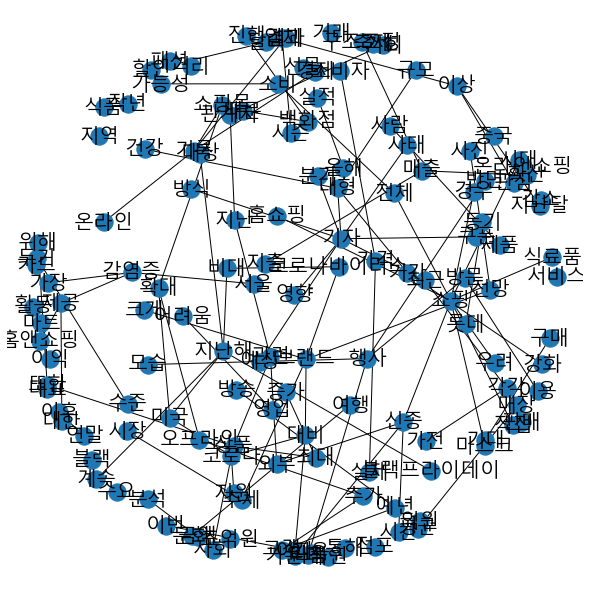

In [51]:
import nltk
from collections import Counter
from wordcloud import WordCloud
import nltk
from matplotlib import font_manager, rc

import networkx as nx

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(8,8))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_2020.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_2020.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정합니다.
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, k=0.6, iterations=150)
#노드 크기 조정
nx.draw(G, pos=pos)

nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=20)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()

In [52]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
from nltk import Text
import matplotlib.pyplot as plt
from collections import Counter

plt.figure(figsize=(12, 3))
kolaw2 = Text(nouns_2020, name="kolaw")
kolaw2.plot(60)
plt.show()

코로나-쇼핑 워드 클라우드

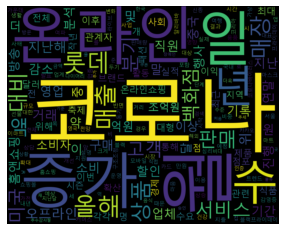

In [54]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = 'c:/Windows/Fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 800, background_color="Black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw2.vocab()), interpolation='bilinear')
plt.axis("off")
plt.show()

- 코로나, 쇼핑을 뺀 wordCLoud

In [55]:
corpus_2020 = "".join(real_contents['contentNew'].tolist())

In [56]:
not_conara = ['코로나', '코로나바이러스', '쇼핑', '데이','월','일','등']
word_list = ['사진', '뉴스', '기자', '쇼핑','제공','등','것','억원','조원','원']
media_list = mediaName['news_media'].tolist()

okt = Okt()
nouns_2020_coX = nouns_tagger.nouns(corpus_2020)
nouns_2020_coX = [noun for noun in nouns_2020_coX if noun not in not_conara]
nouns_2020_coX = [noun for noun in nouns_2020_coX if noun not in word_list]
nouns_2020_coX = [noun for noun in nouns_2020_coX if noun not in media_list]
nouns_2020_coX = [noun for noun in nouns_2020_coX if  len(noun) > 1]

count_2020_coX = Counter(nouns_2020_coX)

In [57]:
remove_char_counter_2020_coX = Counter({x : count_2020_coX[x] for x in count_2020_coX if len(x) > 1})

In [58]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
remove_char_counter_2020_coX.items()
node_df_coX = pd.DataFrame(remove_char_counter_2020_coX.items(), columns=['node', 'nodesize']) 
node_df_coX = node_df_coX[node_df_coX['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’ 5 이하는 제거합니다.
node_df_coX

,node,nodesize
0,신세계,84
2,행사,62
4,진행,66
6,방송,108
7,그룹,12
...,...,...
2976,써니,5
2977,김재원,9
2979,원장,5
3149,웰니스,8


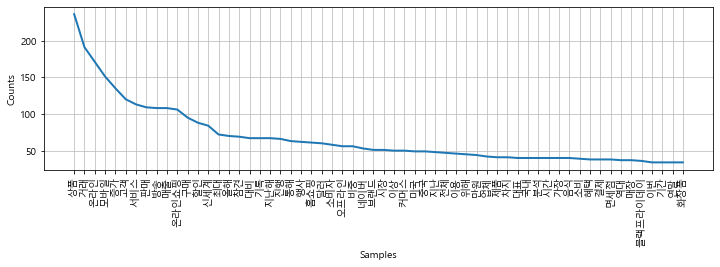

In [59]:
from nltk import Text
import matplotlib.pyplot as plt
from collections import Counter

plt.figure(figsize=(12, 3))
kolaw2020_coX = Text(nouns_2020_coX, name="kolaw")
kolaw2020_coX.plot(60)
plt.show()

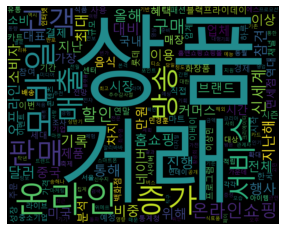

In [60]:
wc = WordCloud(width = 1000, height = 800, background_color="Black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw2020_coX.vocab()), interpolation='bilinear')
plt.axis("off")
plt.show()

### 13주차 최종 발표 후 더 보충하고자 한 내용 : LDA 심화 

- CountVectorizer 클래스로 BoW 만들기

In [95]:
#corpus_2020 사용
corpus_BoW= real_contents['contentNew'].tolist()

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

In [97]:
#코퍼스로부터 문서별 단어를 정수로 매핑하고, 단어의 빈도 수를 희소행렬(sparse martrix)로 변환
sp_mat = vector.fit_transform(corpus_BoW)
#numpy array로 보기
sp_mat.toarray()
#단어: 정수인덱스로 구성된 딕션너리
#vector.vocabulary_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [98]:
words = pd.read_csv('capston/stop_words1.csv')

In [99]:
#불용어 제거
word_list = ['사진', '뉴스', '기자', '쇼핑','제공','등','것','억원','조원','원','데이','월','일','등']
media_list = mediaName['news_media'].tolist()
media_list

result =[]

for i in word_list:
    result.append(i)
    
for i in media_list:
    result.append(i)
    
for i in stopWord_1:
    result.append(i)
    
#result

In [100]:
# 불용어를 제거한 BoW 모델
stopWord_1 = words['word1'].values.tolist()
vector = CountVectorizer(stop_words= result)

print(vector.fit_transform(corpus_BoW).toarray()) 
#vector.vocabulary_

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\dajin\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['biz', 'ebs', 'it동아', 'jtbc', 'kbs', 'ktv', 'mbc', 'mbc연예', 'mbn', 'mhn스포츠', 'mk스포츠', 'osen', 'sbs', 'sbs연예뉴스', 'tv리포트', 'ytn', '가서', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '내집', '년도', '논하지', '누가', '다시', '대로', '대해', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '로드fc', '로피시엘', '만은', '만이', '말하면', '말할것도', '머니s', '몰라도', '몰랏다', '못하다', '바꾸어서', '바꿔', '밖에', '방면으로', '보도자료', '보면', '보아', '비길수', '비추어', '뿐만', '생각이다', '서술한바와같이', '시사in', '쓰여', '아니다', '아니라', '아웃도어', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않도록', '알겠는가', '없고', '없다', '연합뉴스tv', '예를', '외에', '우에', '월간', '위에서', '이와', '이유는', '임에', '있다', '전원속의', '점에서', '종합한것과같이', '주저하지', '줄은', '중앙sunday', '채널a', '코리아', '틀림없다', '편이', '하기', '하는', '하는것만', '하는것이', '하다', '하지', '한국경제tv', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  war

In [203]:
def tokenizer(raw_texts, pos=["Noun"], stopword= result):
    p = okt.pos(raw_texts, 
            norm=True,   # 정규화(normalization)
            stem=True    # 어간추출(stemming)
            )
    o = [word for word, tag in p if len(word) > 1 and tag in pos and word not in stopword]
    return(o)

In [102]:
from math import log # IDF 계산을 위해

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer(
    tokenizer=tokenizer, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df=5,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf=True    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
)

X = vectorize.fit_transform(corpus_BoW)
X.toarray()

array([[0.07268375, 0.        , 0.        , ..., 0.10506021, 0.        ,
        0.        ],
       [0.05834585, 0.18111443, 0.        , ..., 0.        , 0.07839028,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12778932,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [104]:
#90개의 기사를 표현하기위해 총 451개의 명사 형태의 단어가 사용
print(X.shape)

(90, 451)


- 코사인 유사도 

In [105]:
from sklearn.metrics.pairwise import linear_kernel
#코사인 유사도
cosine_sim = linear_kernel(X, X)
cosine_sim

array([[1.        , 0.18880043, 0.27466884, ..., 0.09454663, 0.15258846,
        0.03472501],
       [0.18880043, 1.        , 0.10137277, ..., 0.23696216, 0.22865896,
        0.15710995],
       [0.27466884, 0.10137277, 1.        , ..., 0.06150803, 0.03209448,
        0.06566891],
       ...,
       [0.09454663, 0.23696216, 0.06150803, ..., 1.        , 0.02434144,
        0.10918945],
       [0.15258846, 0.22865896, 0.03209448, ..., 0.02434144, 1.        ,
        0.02280539],
       [0.03472501, 0.15710995, 0.06566891, ..., 0.10918945, 0.02280539,
        1.        ]])

In [106]:
indices = pd.Series(news_list4.index, index=news_list4['title']).drop_duplicates()
print(indices.head())

title
히트 상품도 바꾼 코로나..쇼핑 검색 1위는 '마스크'             0
변종 코로나에도 "쇼핑은 해야 돼~"                       1
코로나시대 쇼핑은 블랙프라이데이 대신 사이버 먼데이               2
롯데쇼핑, '코로나 블루' 극복 위한 맞춤 심리상담               3
[주말쇼핑포인트]코로나 시대 쇼핑은?..백화점 세일도 '언택트'가...    4
dtype: int64


In [107]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 기사의 타이틀로부터 해당되는 인덱스를 받아옵니다. 
    # 이제 선택한 기사를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 기사에 대해서 해당 기사와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 기사들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 기사를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 기사의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 기사의 제목을 리턴합니다.
    return news_list4['title'].iloc[movie_indices]

In [108]:
# 관련 기사 추천 결과

In [109]:
get_recommendations('변종 코로나에도 "쇼핑은 해야 돼~"')

74             코로나19에 온라인쇼핑 확산..광주 대형소매점 매출 뚝
13                "마스크·게임기, 잘 팔렸다" 코로나가 바꾼 쇼핑
34                홈앤쇼핑, 코로나19 취약계층 위해 5천만원 전달
46     롯데쇼핑, 코로나에 실적 곤두박질..'비효율점포' 도려내 체질개...
40             홈앤쇼핑, 코로나19 시대 패션 경쟁력은 '고급 소재'
47    롯데쇼핑 코로나19에도 3분기 순이익 흑자전환 ..가전·건강식품 ...
52    롯데쇼핑, '코로나' 속 선방..3Q 영업익 전년比 26.8%↑(종합)
37              매장 쇼핑처럼 실감..코로나에 각광받는 '가상 쇼핑'
19         백화점을 손으로 둘러보고 쇼핑, 코로나가 앞당긴 가상매장 시대
39             알리바바, '3D 쇼핑' 개시..포스트 코로나 新쇼핑법
Name: title, dtype: object

In [110]:
get_recommendations("롯데쇼핑, '코로나 블루' 극복 위한 맞춤 심리상담")

24         홈앤쇼핑, 코로나19 언텍트 시대..'선물하기' 온라인 서비스 개시
49    [GAIC2020]"코로나 사라져도 쇼핑은 온라인으로..물류시설 투자 ...
7         英 "변종 코로나보다 쇼핑이 먼저"..박싱데이, 새벽 4시부터 장사진
11                       코로나 팬데믹속 온라인 쇼핑 붐..내년은?
62              코로나에 온라인 쇼핑 늘었다..신용카드 승인액 5.4% ↑
39                알리바바, '3D 쇼핑' 개시..포스트 코로나 新쇼핑법
67                이번주 증시, 코로나 백신 기대 속 미국 쇼핑시즌 시작
0                 히트 상품도 바꾼 코로나..쇼핑 검색 1위는 '마스크'
60                    홈앤쇼핑, 코로나19 극복 지역경제 살리기 나서
54              홈앤쇼핑, 코로나19 장기화 침체된 패션 시장 살리기 앞장
Name: title, dtype: object

### Topic Modeling

In [201]:
n = X.toarray()

In [138]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components= 5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

5

In [139]:
np.shape(svd_model.components_)

(5, 451)

In [140]:
terms = vectorize.get_feature_names() # 단어 집합. 

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('거래', 0.19421), ('온라인쇼핑', 0.17564), ('증가', 0.17561), ('모바일', 0.17494), ('상품', 0.16519)]
Topic 2: [('온라인쇼핑', 0.26991), ('거래', 0.2362), ('증가', 0.17771), ('음식', 0.1554), ('비중', 0.15232)]
Topic 3: [('참견', 0.35969), ('민경훈', 0.22422), ('이상민', 0.22402), ('황광희', 0.1995), ('송해나', 0.19614)]
Topic 4: [('달러', 0.23727), ('미국', 0.22827), ('블랙프라이데이', 0.20831), ('매출', 0.18567), ('추수감사절', 0.18454)]
Topic 5: [('할인', 0.19694), ('혜택', 0.19362), ('신세계', 0.1862), ('만원', 0.14353), ('이벤트', 0.12549)]


#### LDA 

LDA = 주어진 문서에 대하여 각 문서에 어떤 주제들이 존재하는지에 대한 확률모형

In [115]:
import pandas as pd
import numpy as np
import string
import os
import glob
import matplotlib.pyplot as plt
from pprint import pprint

In [116]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models import LdaModel

In [117]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models

In [118]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [249]:
# Split words in news aticles
#news = real_contents2020['news_text'].tolist()
#news = real_contents2020['news_text'].tolist()
#news = [sent.split(',') for sent in news]
display(len(transactions_2020))
transactions_2020[0]

75

['서울',
 '손정',
 '코로나',
 '사태',
 '검색어',
 '홈쇼핑',
 '판매량',
 '순위도',
 '예년',
 '티몬',
 '지난',
 '월일',
 '검색',
 '데이터',
 '분석',
 '결과',
 '올해',
 '가장',
 '검색',
 '단어',
 '마스크',
 '지난해',
 '해도',
 '마스크',
 '주요',
 '검색',
 '순위',
 '이름',
 '마스크',
 '올해',
 '처음',
 '검색',
 '상위',
 '오른',
 '단어',
 '게임기',
 '코로나',
 '사태',
 '실내',
 '생활',
 '여가',
 '생활',
 '하나로',
 '게임',
 '사람',
 '분석',
 '반면',
 '여행',
 '관련',
 '단어',
 '대부분',
 '순위',
 '지난해',
 '레저',
 '입장권',
 '해외여행',
 '올해',
 '지난해',
 '여행',
 '추세',
 '티몬',
 '다른',
 '쇼핑몰',
 '홈쇼핑',
 '홈쇼핑',
 '판매량',
 '마스크',
 '황사',
 '마스크',
 '퓨어',
 '마스크',
 '사회',
 '거리',
 '두기',
 '횟수',
 '식품',
 '보양식',
 '전복',
 '판매량',
 '전체',
 '맥락',
 '분석',
 '홈쇼핑',
 '관계자',
 '코로나',
 '사태',
 '노멀',
 '트렌드',
 '홈쇼핑',
 '상품',
 '그대로',
 '현대',
 '홈쇼핑',
 '일편',
 '마스크',
 '기존',
 '상위',
 '뷰티',
 '헤어',
 '관련',
 '상품',
 '순위',
 '각종',
 '식품',
 '진입',
 '역시',
 '코로나',
 '사태',
 '영향',
 '풀이',
 '식품',
 '브랜드',
 '천하',
 '일미',
 '주부',
 '롯데',
 '홈쇼핑',
 '식품',
 '각종',
 '식품',
 '취급',
 '김나운',
 '키친',
 '진입',
 '김나운',
 '키친',
 '제품',
 '작년',
 '매출',
 '이상',
 '공감',
 '언론']

In [250]:
# Create Dictionary
id2word = corpora.Dictionary(transactions_2020)

# Create Corpus
texts = transactions_2020

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 1), (1, 2), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 7), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1), (30, 1), (31, 4), (32, 1), (33, 2), (34, 2), (35, 2), (36, 1), (37, 1), (38, 1), (39, 3), (40, 1), (41, 5), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 3), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 3), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 4), (71, 2), (72, 1), (73, 2), (74, 3), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 7), (83, 1), (84, 1)], [(29, 1), (43, 1), (63, 1), (70, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), 

In [251]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    coherence = []
    model_list = []
    model_list2 = []
    for num_topics in range(start, limit, step):
      print(num_topics)
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics, 
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    #Coherence
      coherencemodel2 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
      coherence.append(coherencemodel2.get_coherence())
    #Perplexity
      model.log_perplexity(corpus)
      model_list2.append(model.log_perplexity(corpus))
    return model_list, coherence_values, coherence, model_list2

In [252]:
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=6, step=1)

1
2
3
4
5


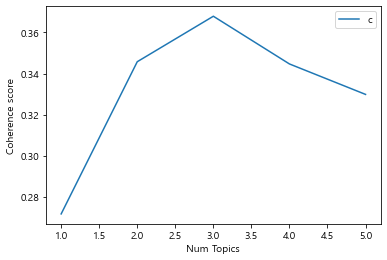

In [253]:
limit=6; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [254]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.2717
Num Topics = 2  has Coherence Value of 0.3457
Num Topics = 3  has Coherence Value of 0.3679
Num Topics = 4  has Coherence Value of 0.3447
Num Topics = 5  has Coherence Value of 0.3298


In [255]:
# Print coherence
for m, cv in zip(x, coherence):
  print("Num Topics =", m, " has Coherence of ", cv)

Num Topics = 1  has Coherence of  -1.3313856837835032
Num Topics = 2  has Coherence of  -1.4031192695081893
Num Topics = 3  has Coherence of  -2.232303412148673
Num Topics = 4  has Coherence of  -2.7884612468787875
Num Topics = 5  has Coherence of  -3.369131896426011


In [256]:
#Perplexity print
for m, cv in zip(x, model_list2):
  print("Num Topics =", m, " has Perplexity of ", cv)

Num Topics = 1  has Perplexity of  -7.321365689825838
Num Topics = 2  has Perplexity of  -7.24708562857198
Num Topics = 3  has Perplexity of  -7.202742397684531
Num Topics = 4  has Perplexity of  -7.1825683820747965
Num Topics = 5  has Perplexity of  -7.185160772551269


In [257]:
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=36, step=5)

1
6
11
16
21
26
31


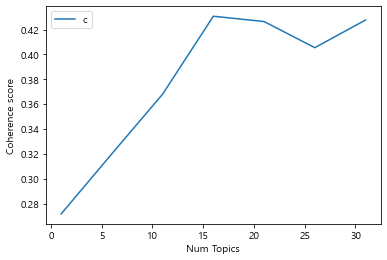

In [258]:
limit=36; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [259]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.2717
Num Topics = 6  has Coherence Value of 0.3201
Num Topics = 11  has Coherence Value of 0.368
Num Topics = 16  has Coherence Value of 0.4307
Num Topics = 21  has Coherence Value of 0.4264
Num Topics = 26  has Coherence Value of 0.4054
Num Topics = 31  has Coherence Value of 0.4277


In [260]:
# Print coherence
for m, cv in zip(x, coherence):
  print("Num Topics =", m, " has Coherence of ", cv)

Num Topics = 1  has Coherence of  -1.3313856837835032
Num Topics = 6  has Coherence of  -3.503641550033414
Num Topics = 11  has Coherence of  -2.8330734857033
Num Topics = 16  has Coherence of  -3.4242832163814088
Num Topics = 21  has Coherence of  -2.5663076758243752
Num Topics = 26  has Coherence of  -3.3362339643232963
Num Topics = 31  has Coherence of  -2.8498751227568073


In [261]:
#Perplexity print
for m, cv in zip(x, model_list2):
  print("Num Topics =", m, " has Perplexity of ", cv)

Num Topics = 1  has Perplexity of  -7.321365689825838
Num Topics = 6  has Perplexity of  -7.19152885707211
Num Topics = 11  has Perplexity of  -7.134175978669445
Num Topics = 16  has Perplexity of  -7.145668382213662
Num Topics = 21  has Perplexity of  -7.181354062585997
Num Topics = 26  has Perplexity of  -7.2001497146728815
Num Topics = 31  has Perplexity of  -7.195796432804626


In [262]:
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=30, limit=36, step=1)

30
31
32
33
34
35


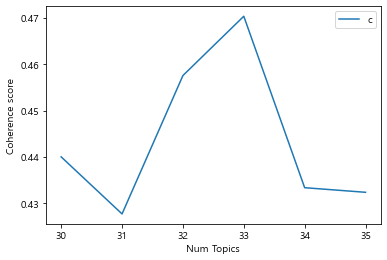

In [263]:
limit=36; start=30; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [264]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 30  has Coherence Value of 0.44
Num Topics = 31  has Coherence Value of 0.4277
Num Topics = 32  has Coherence Value of 0.4576
Num Topics = 33  has Coherence Value of 0.4704
Num Topics = 34  has Coherence Value of 0.4333
Num Topics = 35  has Coherence Value of 0.4324


In [265]:
# Print coherence
for m, cv in zip(x, coherence):
  print("Num Topics =", m, " has Coherence of ", cv)

Num Topics = 30  has Coherence of  -2.497517106775031
Num Topics = 31  has Coherence of  -2.8498751227568073
Num Topics = 32  has Coherence of  -2.8416531017821534
Num Topics = 33  has Coherence of  -2.4456366256529907
Num Topics = 34  has Coherence of  -3.117606272697806
Num Topics = 35  has Coherence of  -2.5666653915735833


In [266]:
#Perplexity print
for m, cv in zip(x, model_list2):
  print("Num Topics =", m, " has Perplexity of ", cv)

Num Topics = 30  has Perplexity of  -7.201386016425797
Num Topics = 31  has Perplexity of  -7.195796432804626
Num Topics = 32  has Perplexity of  -7.2206034557578365
Num Topics = 33  has Perplexity of  -7.193372729833095
Num Topics = 34  has Perplexity of  -7.180598461228198
Num Topics = 35  has Perplexity of  -7.150991311502986


In [267]:
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=35, limit=74, step=5)

35
40
45
50
55
60
65
70


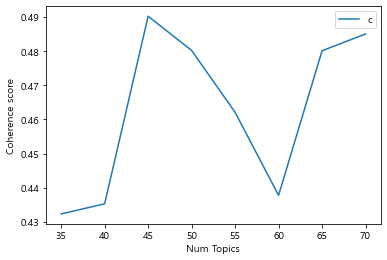

In [268]:
# 원래의 계획 ; limit=41; start=2; step=2;
limit=74; start=35; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [269]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 35  has Coherence Value of 0.4324
Num Topics = 40  has Coherence Value of 0.4353
Num Topics = 45  has Coherence Value of 0.4902
Num Topics = 50  has Coherence Value of 0.4802
Num Topics = 55  has Coherence Value of 0.4621
Num Topics = 60  has Coherence Value of 0.4378
Num Topics = 65  has Coherence Value of 0.4801
Num Topics = 70  has Coherence Value of 0.485


In [270]:
# Print coherence
for m, cv in zip(x, coherence):
  print("Num Topics =", m, " has Coherence of ", cv)

Num Topics = 35  has Coherence of  -2.5666653915735833
Num Topics = 40  has Coherence of  -2.8271633468006376
Num Topics = 45  has Coherence of  -2.2748903537831566
Num Topics = 50  has Coherence of  -2.263731913717298
Num Topics = 55  has Coherence of  -2.7100481684611935
Num Topics = 60  has Coherence of  -3.0439533617089487
Num Topics = 65  has Coherence of  -2.1985537023638386
Num Topics = 70  has Coherence of  -2.099337324425326


In [271]:
#Perplexity print
for m, cv in zip(x, model_list2):
  print("Num Topics =", m, " has Perplexity of ", cv)

Num Topics = 35  has Perplexity of  -7.150991311502986
Num Topics = 40  has Perplexity of  -7.225506844319135
Num Topics = 45  has Perplexity of  -7.232443656761645
Num Topics = 50  has Perplexity of  -7.202212934986323
Num Topics = 55  has Perplexity of  -7.240069535420013
Num Topics = 60  has Perplexity of  -7.281132632130999
Num Topics = 65  has Perplexity of  -7.279266684556625
Num Topics = 70  has Perplexity of  -7.277105195865499


In [ ]:
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=3, limit=46, step=3)

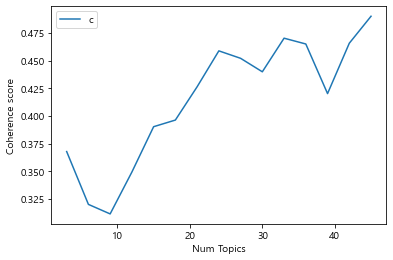

In [274]:
limit=46; start=3; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [275]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.3679
Num Topics = 6  has Coherence Value of 0.3201
Num Topics = 9  has Coherence Value of 0.3115
Num Topics = 12  has Coherence Value of 0.3494
Num Topics = 15  has Coherence Value of 0.3904
Num Topics = 18  has Coherence Value of 0.3964
Num Topics = 21  has Coherence Value of 0.4264
Num Topics = 24  has Coherence Value of 0.4589
Num Topics = 27  has Coherence Value of 0.4522
Num Topics = 30  has Coherence Value of 0.44
Num Topics = 33  has Coherence Value of 0.4704
Num Topics = 36  has Coherence Value of 0.4651
Num Topics = 39  has Coherence Value of 0.4203
Num Topics = 42  has Coherence Value of 0.4658
Num Topics = 45  has Coherence Value of 0.4902


In [281]:
# Print coherence, Perplexity ->  coherence 높고 Perplexity낮은 것을 택하기 -> 여기서는 topic 18개가 충족
for m, cv, cv2 in zip(x, coherence, model_list2):
    print("Num Topics =", m, " has Coherence of ", cv)
    print("Num Topics =", m, " has Perplexity of ", cv2)
    print("\n")

Num Topics = 3  has Coherence of  -2.232303412148673
Num Topics = 3  has Perplexity of  -7.202742397684531


Num Topics = 6  has Coherence of  -3.503641550033414
Num Topics = 6  has Perplexity of  -7.19152885707211


Num Topics = 9  has Coherence of  -3.2805633269959986
Num Topics = 9  has Perplexity of  -7.1724953560214555


Num Topics = 12  has Coherence of  -3.1068281278710153
Num Topics = 12  has Perplexity of  -7.162030502552931


Num Topics = 15  has Coherence of  -3.3734714932852845
Num Topics = 15  has Perplexity of  -7.148549922539233


Num Topics = 18  has Coherence of  -3.4698626800287324
Num Topics = 18  has Perplexity of  -7.140361448436947


Num Topics = 21  has Coherence of  -2.5663076758243752
Num Topics = 21  has Perplexity of  -7.181354062585997


Num Topics = 24  has Coherence of  -2.637611105075137
Num Topics = 24  has Perplexity of  -7.169610673083705


Num Topics = 27  has Coherence of  -3.107357043158044
Num Topics = 27  has Perplexity of  -7.1447563681145


Num 

In [282]:
# topic = 16, 18개 중 뭐가 더 나은 지 확인 하기 
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=16, limit=19, step=2)

16
18


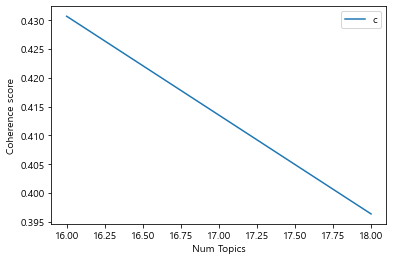

In [283]:
limit=19; start=16; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [285]:
# Print coherence, Perplexity ->  coherence 높고 Perplexity낮은 것을 택하기 -> 여기서는 topic 18개가 충족
for m, cv, cv2 in zip(x, coherence, model_list2):
    print("Num Topics =", m, " has Coherence of ", round(cv,2))
    print("Num Topics =", m, " has Perplexity of ", round(cv2,2))
    print("\n")

Num Topics = 16  has Coherence of  -3.42
Num Topics = 16  has Perplexity of  -7.15


Num Topics = 18  has Coherence of  -3.47
Num Topics = 18  has Perplexity of  -7.14




- coherence는 주제의 일관성을 측정합니다. 해당 토픽모델이, 모델링이 잘 되었을수록 한 주제 안에는 의미론적으로 유사한 단어가 많이 모여있게 마련입니다. 따라서 상위 단어 간의 유사도를 계산하면 실제로 해당 주제가 의미론적으로 일치하는 단어들끼리 모여있는지 알 수 있습니다.

토픽이 얼마나 의미론적으로 일관성 있는지.
높을수록 의미론적 일관성 높음
해당 모델이 얼마나 실제로 의미있는 결과를 내는지 확인하기 위해 사용
평가를 진행하기 위해 다른 외부 데이터(코퍼스, 시소러스 등)가 필요

- Perplexity 전적으로는 혼란도 쓰임,  즉 특정 확률 모델이 실제도 관측되는 값을 어마나 잘 예측하는지를 뜻한다. Perlexity값이 작으면 토픽모델이 문서를 잘 반영된다. 따라서 작아지는것이 중요하다.

In [291]:
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.027*"검색" + 0.022*"티몬" + 0.021*"마스크" + 0.017*"올해" + 0.016*"순위" + '
  '0.015*"상품" + 0.015*"코로나" + 0.015*"고객" + 0.014*"여행" + 0.014*"홈앤쇼핑"'),
 (1,
  '0.021*"콘텐츠" + 0.020*"방송" + 0.017*"지역" + 0.015*"코로나" + 0.012*"재단" + '
  '0.011*"홈앤쇼핑" + 0.011*"행사" + 0.009*"홈쇼핑" + 0.009*"사회" + 0.008*"지난"'),
 (2,
  '0.022*"온라인" + 0.017*"코로나" + 0.016*"미국" + 0.011*"매장" + 0.010*"달러" + '
  '0.010*"프라이데이" + 0.010*"블랙" + 0.008*"업체" + 0.008*"올해" + 0.008*"인증"'),
 (3,
  '0.039*"매장" + 0.023*"가상" + 0.015*"온라인" + 0.013*"코로나" + 0.011*"이마트" + '
  '0.011*"실제" + 0.009*"고객" + 0.009*"업체" + 0.008*"점포" + 0.008*"독일"'),
 (4,
  '0.016*"상품" + 0.016*"홈앤쇼핑" + 0.015*"코로나" + 0.013*"캐시미어" + 0.013*"앙고라" + '
  '0.013*"반영" + 0.010*"후라밍" + 0.010*"니트" + 0.010*"고객" + 0.010*"급증"'),
 (5,
  '0.024*"선수" + 0.024*"울버햄튼" + 0.014*"코로나" + 0.014*"단계" + 0.010*"감독" + '
  '0.010*"산투" + 0.007*"조치" + 0.007*"우리" + 0.007*"프리미어리그" + 0.007*"토트넘"'),
 (6,
  '0.033*"물류" + 0.025*"시설" + 0.023*"투자" + 0.017*"부동산" + 0.014*"승인" + '
  '0.010*"전자상거래" + 0.010*"규모

In [290]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
#pyLDAvis.display(vis)

In [293]:
pyLDAvis.save_html(vis, 'ldavis.html')

In [296]:
# 2->3개로 넘어갈때에도 value가 눈에 띄게 넘음
model_list, coherence_values, coherence, model_list2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=4, step=1)

1
2
3


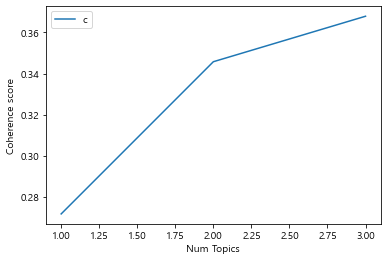

In [297]:
limit=4; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values[2-3]"), loc='best')
plt.show()

In [300]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.016*"코로나" + 0.010*"올해" + 0.006*"온라인" + 0.006*"미국" + 0.006*"이번" + '
  '0.006*"직원" + 0.005*"이후" + 0.005*"고객" + 0.005*"오프라인" + 0.005*"검색"'),
 (1,
  '0.017*"증가" + 0.014*"롯데" + 0.013*"매출" + 0.012*"코로나" + 0.010*"상품" + '
  '0.010*"분기" + 0.010*"대비" + 0.009*"백화점" + 0.008*"감소" + 0.008*"거래"'),
 (2,
  '0.017*"코로나" + 0.015*"온라인" + 0.013*"매장" + 0.007*"올해" + 0.007*"업체" + '
  '0.006*"미국" + 0.006*"중국" + 0.006*"직원" + 0.005*"증가" + 0.005*"축제"')]


In [303]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis3 = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
#pyLDAvis.display(vis3)

In [302]:
pyLDAvis.save_html(vis3, 'ldavis-topic3.html')

- html 파일을 통한 # Visualize the topics 시각화

____________________________________________________________________________________________________________________________________________________________________

#### 추가적으로 해야하는 데이터 셋 [2020- 언론사 뉴스] - 언론사 탐색 필수 - 1학기 여기는 해결하지 못함